In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()

# 获得确定性的随机数
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 向数据中添加噪声特征
# 前30个特征来自数据集，后50个是噪声
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# 使用f_classif（默认值）和SelectPercentile来选择50%的特征
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# 对训练集进行变换
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


C:\Users\xiankui.qin\AppData\Local\Temp\ipykernel_161716\3151825244.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


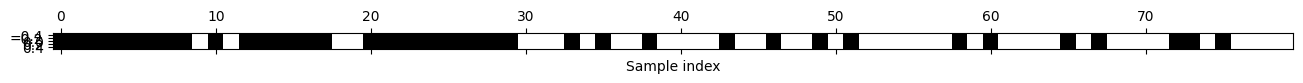

In [5]:
import matplotlib.pyplot as plt

mask = select.get_support()
print(mask)
# 将遮罩可视化——黑色为True，白色为False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

plt.tight_layout()
plt.savefig('Images/05AutomatedFeatureSelection-01.png', bbox_inches='tight')
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression

# 对测试数据进行变换
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.919
Score with only selected features: 0.919


D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [8]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


C:\Users\xiankui.qin\AppData\Local\Temp\ipykernel_161716\1809349143.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


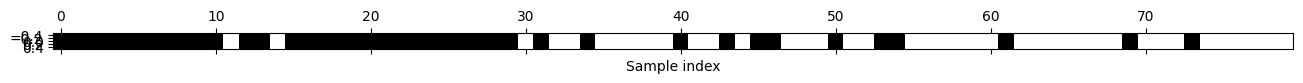

In [10]:
mask = select.get_support()
# 将遮罩可视化——黑色为True，白色为False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

plt.tight_layout()
plt.savefig('Images/05AutomatedFeatureSelection-02.png', bbox_inches='tight')
plt.show()

In [11]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.930


D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\xiankui.qin\AppData\Local\Temp\ipykernel_161716\2836743666.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


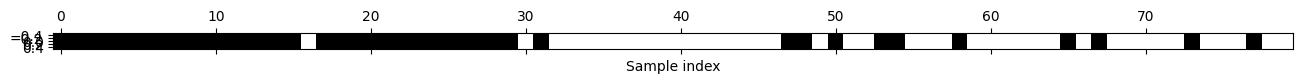

In [13]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)
select.fit(X_train, y_train)
# 将选中的特征可视化：
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

plt.tight_layout()
plt.savefig('Images/05AutomatedFeatureSelection-03.png', bbox_inches='tight')
plt.show()

In [14]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))


Test score: 0.930


D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


In [18]:
import mglearn

citibike = mglearn.datasets.load_citibike()
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3h, Name: one, dtype: int64


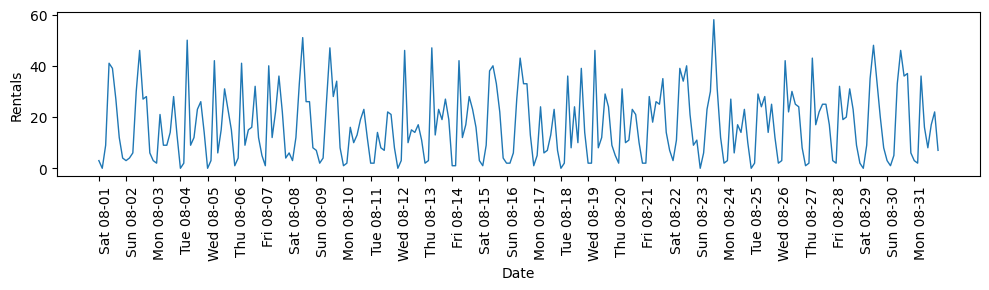

In [21]:
import pandas as pd

plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

plt.tight_layout()
plt.savefig('Images/05AutomatedFeatureSelection-04.png', bbox_inches='tight')
plt.show()

In [31]:
# 提取目标值（租车数量）
y = citibike.values

# 将时间转换为 POSIX 时间（即时间戳）
X = citibike.index
X = pd.to_datetime(X)  # 确保索引是日期时间格式
X = X.view('int64') // 10**9  # 转换为秒时间戳并转换为整数

# 转换为二维数组
X = X.reshape(-1, 1)

print(X[:5])
print(y[:5])

[[1438387200]
 [1438398000]
 [1438408800]
 [1438419600]
 [1438430400]]
[ 3  0  9 41 39]


In [32]:
# 使用前184个数据点用于训练，剩余的数据点用于测试
n_train = 184

# 对给定特征集上的回归进行评估和作图的函数
def eval_on_features(features, target, regressor):
    # 将给定特征划分为训练集和测试集
    X_train, X_test = features[:n_train], features[n_train:]
    # 同样划分目标数组
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


<Figure size 640x480 with 0 Axes>

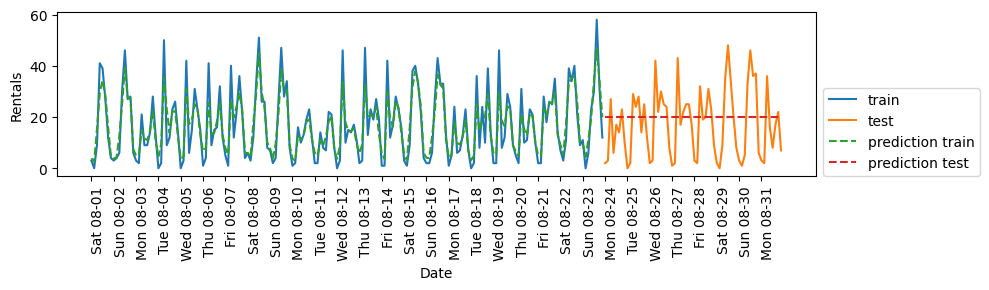

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

plt.tight_layout()
plt.savefig('Images/05AutomatedFeatureSelection-05.png', bbox_inches='tight')
plt.show()

Test-set R^2: 0.60


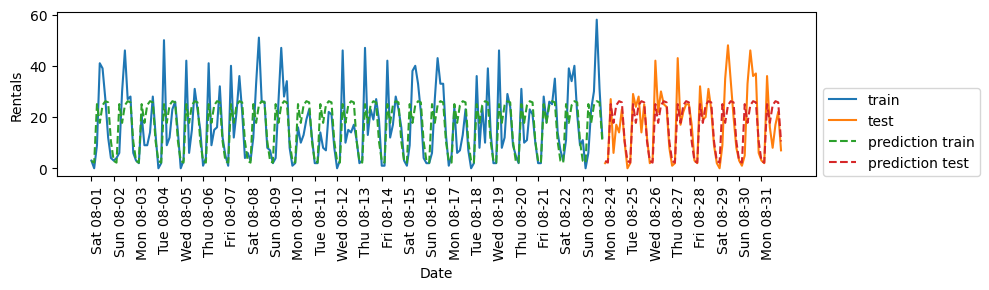

In [37]:
# 获取小时信息并转换为二维数组
X_hour = citibike.index.hour.to_numpy().reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

plt.tight_layout()
plt.savefig('Images/05AutomatedFeatureSelection-06.png', bbox_inches='tight')
plt.show()

Test-set R^2: 0.84


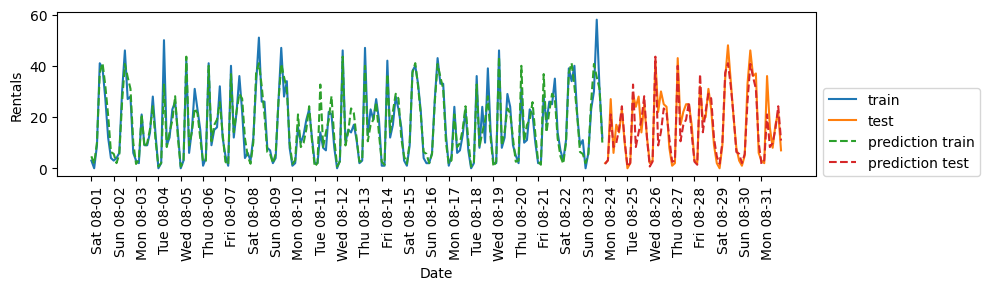

In [40]:
X_hour_week = np.hstack([citibike.index.dayofweek.to_numpy().reshape(-1, 1),
                         citibike.index.hour.to_numpy().reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

plt.tight_layout()
plt.savefig('Images/05AutomatedFeatureSelection-07.png', bbox_inches='tight')
plt.show()

Test-set R^2: 0.13


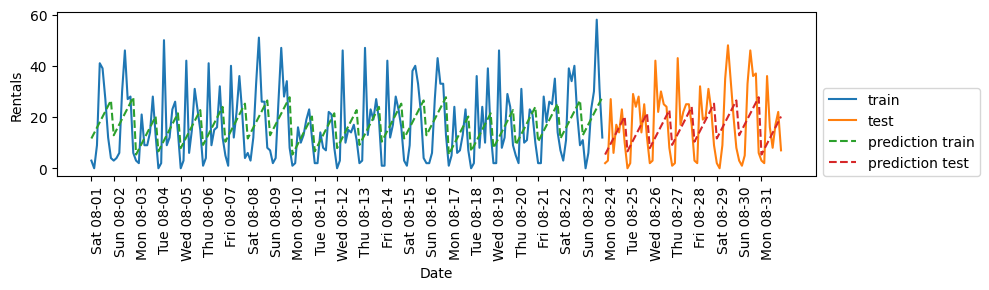

In [41]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

plt.tight_layout()
plt.savefig('Images/05AutomatedFeatureSelection-08.png', bbox_inches='tight')
plt.show()

Test-set R^2: 0.62


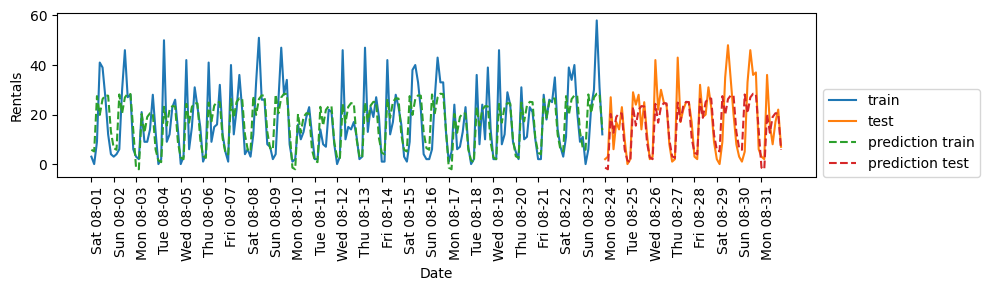

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, Ridge())

plt.tight_layout()
plt.savefig('Images/05AutomatedFeatureSelection-09.png', bbox_inches='tight')
plt.show()

Test-set R^2: 0.85


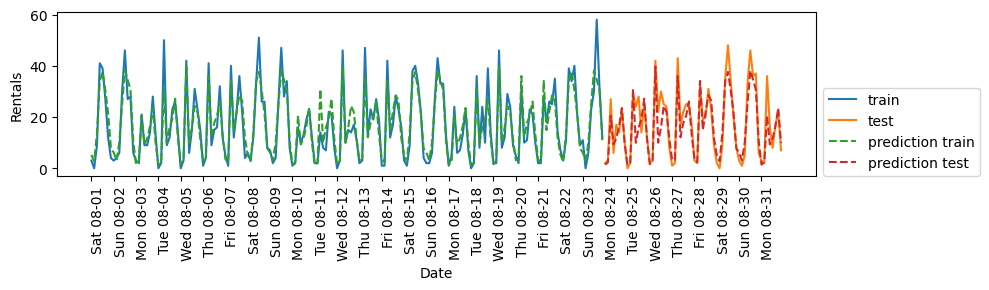

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

plt.tight_layout()
plt.savefig('Images/05AutomatedFeatureSelection-10.png', bbox_inches='tight')
plt.show()

In [48]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

In [50]:
features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

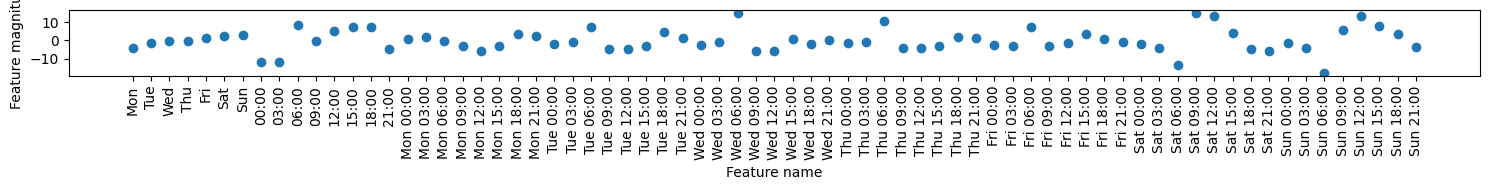

In [51]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")

plt.tight_layout()
plt.savefig('Images/05AutomatedFeatureSelection-11.png', bbox_inches='tight')
plt.show()